# Dinámica no lineal: La teoría del caos
<i> Daiana Dominikow - 2025 </i>

La primera investigación del caos vino de la mano del meteorólogo Edward Lorentz, quien en 1960 utilizaba un modelo matemático para predecir ciertas condiciones climáticas y la convección térmica de los fluídos . Su modelo consistía de un sistema de ecuaciones no lineales calculados por computadora.

En una oportunidad quizo repetir una medición cambiando las cifras significativas de los parámetros que le pasaba a su sistema de ecuaciones, y notó que su modelo no se comportaba como hubiese esperado. Sus resultados dependían en gran medida de la exactitud de sus parámetros, lo que denominó Teoria del caos.

Lorentz ya no podía predecir con exactitud el comportamiento de un sistema  ya que todas sus mediciones se verían afectadas por errores de calibración de sus intrumentos dando a desconocer las condiciones iniciales absolutas del sistema, a partir de ésto estudió el comportamiento caótico 
<center><img src="./resources/Lorentz.png" width="400" height="280" ></center>

Para que un sistema se considere caótico, debe: 

- Ser determinista, es decir, no es azaroso, sino que seguirá el mismo patrón dadas las mismas exactas condiciones iniciales 
- Involucrar mas de 3 variables 
- Ser irregular en el tiempo, y dado su carácter no lineal no puede ser la superposición de movimientos periódicos
- Ser imprevisible a largo plazo y sensible a las condiciones iniciales
- Su retrato de fases está formado por fractales complicados 





### Atractor de Rössler

Originalmente estudiado por el bioquímico  Otto Rössler en los 70s, el atractor es el resultado de un sistema de ecuaciones diferenciales dos lineales y una no lineal, continuas y dependientes del tiempo, que exhiben una dinámica caótica asociada a las propiedades fractales del atractor.Se caracteriza por su densidad de órbitas caóticas en torno a un punto fijo, el centro del atractor.

Este atractor estaba pensado para comportarse como el de Lorentz pero de manera mas sencilla de explicar y analizar, aunque actualmente se utiliza para modelar el equilibrio químico de ciertas reacciones donde las variables (parámetros) de las ecuaciones representan la concentracion de la sustancia.

\begin{equation} 
    \begin{cases}
        \frac{\partial x}{\partial t} =  - y - z  \\
        \frac{\partial y}{\partial t} =  x + ay \\
        \frac{\partial z}{\partial t} =  b + z( x - c ) \\
    \end{cases}
\end{equation}

Para la resolución de éstas diferenciales, se utilizará el método de Euler de primer orden.

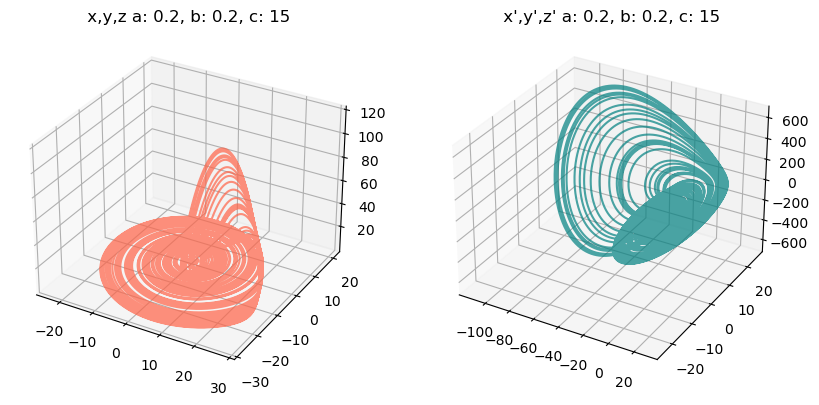

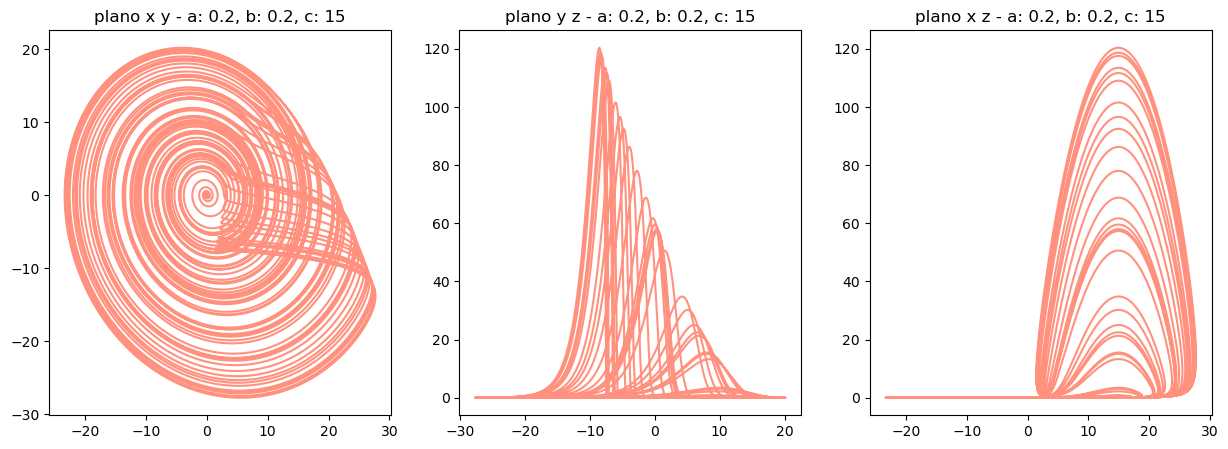

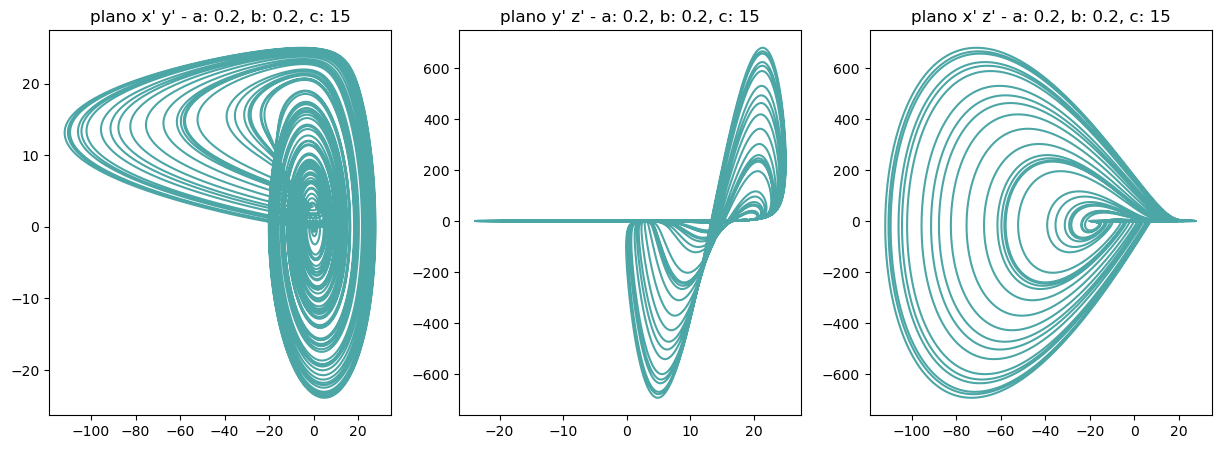

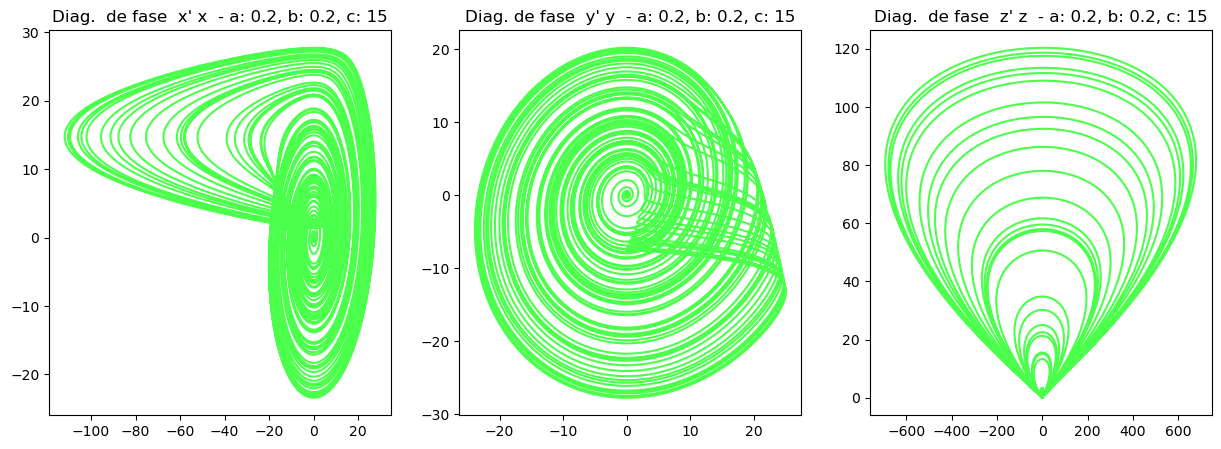

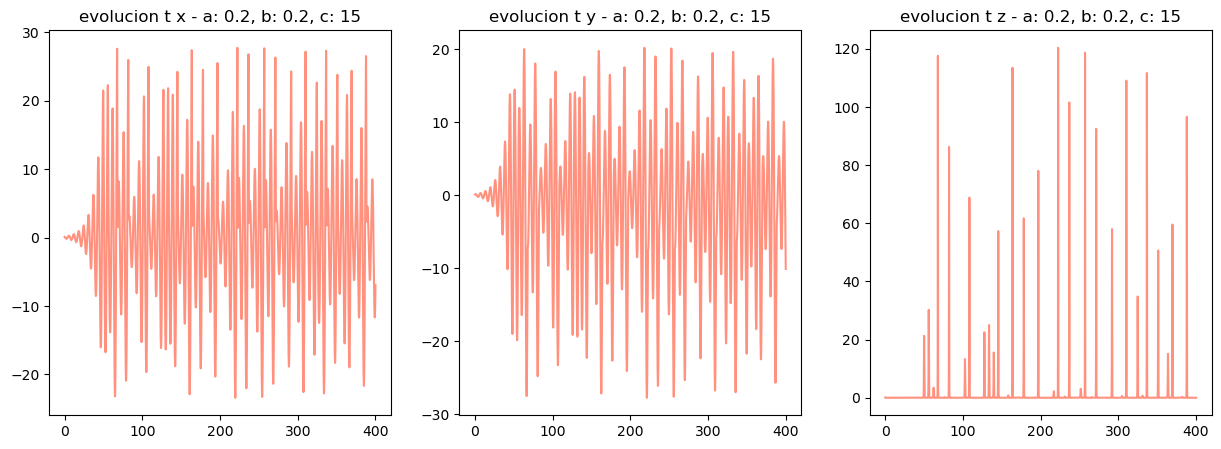

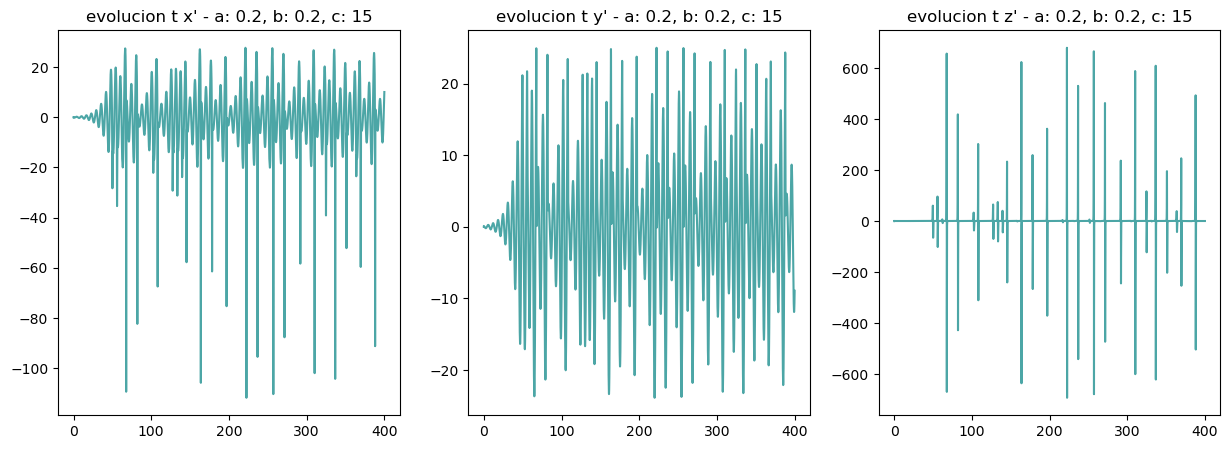

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#parámetros simulación
a= 0.2
b= 0.2
c= 15
#color de los ploteos
m= 'tomato'
#variables estáticas
dt= 0.001
tf= 400
t = np.arange(0 , tf + dt ,dt)
x = np.zeros(len(t))
x1 = np.zeros(len(t)) #primer derivada
y = np.zeros(len(t))
y1 = np.zeros(len(t)) #primer derivada
z = np.zeros(len(t))
z1 = np.zeros(len(t)) #primer derivada
#condiciones iniciales
i=0
x[i]=0.1
y[i]=0.1
z[i]=0.1
x1[i]=0
y1[i]=0
z1[i]=0
 
while i < len(t) - 1:
    #método de Cromer, invierto el orden de cómputo, primero calculo la derivada (velocidad) y en base a ella calculo la nueva posicón. 
  x1[i+1] = - y[i] - z[i]
  y1[i+1] = x[i]  + (a * y[i])
  z1[i+1] = b + z[i] * (x[i] - c)
  x[i+1] = x[i] + x1[i+1] * dt
  y[i+1] = y[i] + y1[i+1] * dt
  z[i+1] = z[i] + z1[i+1] * dt
  i = i+1

figure, axis = plt.subplots(1,2,figsize=(10,5),subplot_kw=dict(projection='3d'))
axis[0].plot(x,y,z,color = m,alpha =0.7)
axis[0].set_title(" x,y,z " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[1].plot(x1,y1,z1,color = 'teal',alpha =0.7)
axis[1].set_title(" x',y',z' " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
plt.show()

figure, axis = plt.subplots(1,3,figsize=(15,5))
axis[0].plot(x, y,color = m, alpha =0.7)
axis[0].set_title("plano x y - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[1].plot(y, z,color = m,alpha =0.7)
axis[1].set_title("plano y z - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[2].plot(x, z,color = m,alpha =0.7)
axis[2].set_title("plano x z - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
plt.show()
figure, axis = plt.subplots(1,3,figsize=(15,5))
axis[0].plot(x1, y1, color = 'teal',alpha =0.7)
axis[0].set_title("plano x' y' - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[1].plot(y1, z1, color = 'teal',alpha =0.7 )
axis[1].set_title("plano y' z' - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[2].plot(x1, z1, color = 'teal',alpha =0.7 )
axis[2].set_title("plano x' z' - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
plt.show()
figure, axis = plt.subplots(1,3,figsize=(15,5))
axis[0].plot(x1, x,color = 'lime',alpha =0.7)
axis[0].set_title("Diag.  de fase  x' x  - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[1].plot(y1, y,color = 'lime',alpha =0.7)
axis[1].set_title("Diag. de fase  y' y  - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[2].plot(z1, z,color = 'lime',alpha =0.7)
axis[2].set_title("Diag.  de fase  z' z  - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
plt.show()
figure, axis = plt.subplots(1,3,figsize=(15,5))
axis[0].plot(t, x,color = m,alpha =0.7)
axis[0].set_title("evolucion t x - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[1].plot(t, y,color = m,alpha =0.7)
axis[1].set_title("evolucion t y - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[2].plot(t, z,color = m,alpha =0.7)
axis[2].set_title("evolucion t z - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
plt.show()
figure, axis = plt.subplots(1,3,figsize=(15,5))
axis[0].plot(t, x1,color = 'teal',alpha =0.7)
axis[0].set_title("evolucion t x' - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[1].plot(t, y1,color = 'teal',alpha =0.7)
axis[1].set_title("evolucion t y' - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
axis[2].plot(t, z1,color = 'teal',alpha =0.7)
axis[2].set_title("evolucion t z' - " + "a: " + str(a)  + ", b: " + str(b) +", c: " + str(c))
plt.show()

